# Use Community Shared LoRAs and Textual Inversion

## Technical requirements

In [1]:
%pip install transformers accelerate PEFT
%pip install diffusers==0.23.0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


## Prepare Stable Diffusion pipeline

In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16
).to("cuda:0")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

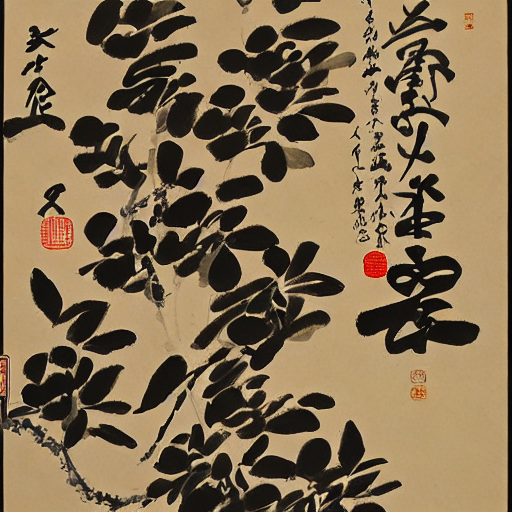

In [4]:
prompt = """
shukezouma, shuimobysim ,a branch of flower, traditional chinese ink painting
"""
image = pipeline(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
display(image)

## Use MixinLoraLoader

### Use lora with default settings

MoXinV1.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--andrewzhu--MoXinV1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


  0%|          | 0/50 [00:00<?, ?it/s]

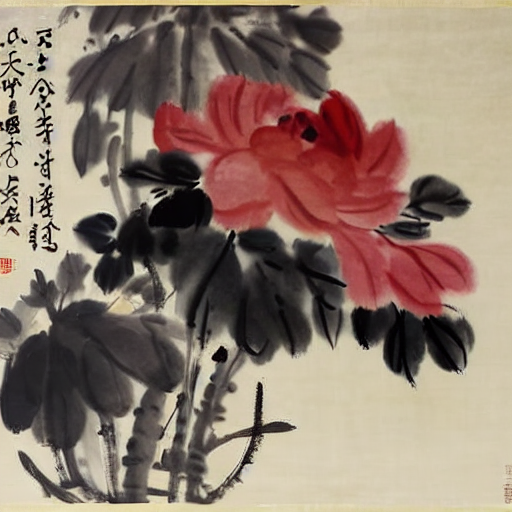

In [5]:
# load lora
pipeline.load_lora_weights(
    "andrewzhu/MoXinV1"
    , weight_name   = "MoXinV1.safetensors"
    , adapter_name  = "MoXinV1"
)

image = pipeline(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
display(image)

### Load LoRA with weight

  0%|          | 0/50 [00:00<?, ?it/s]

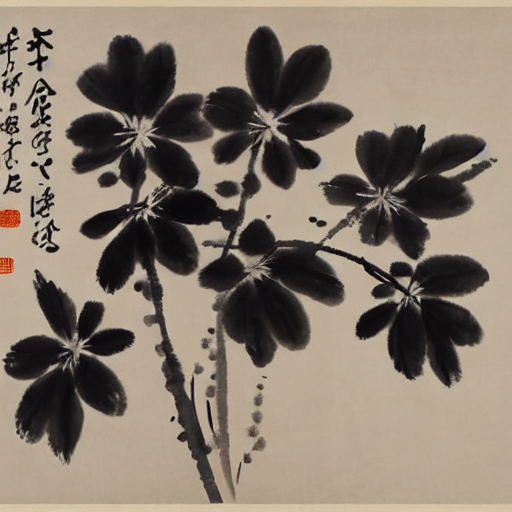

In [6]:
pipeline.set_adapters(
    ["MoXinV1"]
    , adapter_weights=[0.5]
)
image = pipeline(
    prompt = prompt
    , generator = torch.Generator("cuda").manual_seed(1)
).images[0]
display(image)

In [7]:
pipeline.load_lora_weights(
    "andrewzhu/civitai-light-shadow-lora"
    , weight_name   = "light_and_shadow.safetensors"
    , adapter_name  = "light_and_shadow"
)

light_and_shadow.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--andrewzhu--civitai-light-shadow-lora. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


  0%|          | 0/50 [00:00<?, ?it/s]

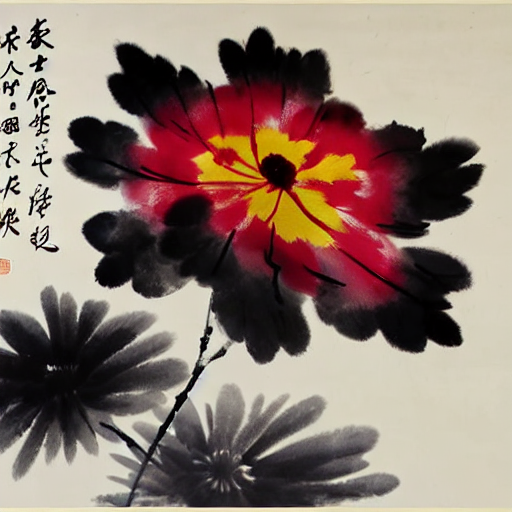

In [8]:
pipeline.set_adapters(
    ["MoXinV1", "light_and_shadow"]
    , adapter_weights=[0.5,1.0]
)
prompt = """
shukezouma, shuimobysim ,a branch of flower, traditional chinese ink painting,STRRY LIGHT,COLORFUL
"""
image = pipeline(
    prompt = prompt
    , generator = torch.Generator("cuda").manual_seed(1)
).images[0]
display(image)

## Dive into LoRA

### Step 1. Find $A$ and $B$ weight matrix from the LoRA file

In [9]:
# load lora file
from safetensors.torch import load_file
# Note you need to change the file path point to your safetensors file
lora_path = "C:\\Users\\Asus\\.cache\\huggingface\\hub\\models--andrewzhu--MoXinV1\\snapshots\\7dbe7e0c8430ab549f2a0a45bc7f875e58c2eb7d\\MoXinV1.safetensors"
state_dict = load_file(lora_path)
for key in state_dict:
    print(key)

lora_te_text_model_encoder_layers_0_mlp_fc1.alpha
lora_te_text_model_encoder_layers_0_mlp_fc1.lora_down.weight
lora_te_text_model_encoder_layers_0_mlp_fc1.lora_up.weight
lora_te_text_model_encoder_layers_0_mlp_fc2.alpha
lora_te_text_model_encoder_layers_0_mlp_fc2.lora_down.weight
lora_te_text_model_encoder_layers_0_mlp_fc2.lora_up.weight
lora_te_text_model_encoder_layers_0_self_attn_k_proj.alpha
lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_down.weight
lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_up.weight
lora_te_text_model_encoder_layers_0_self_attn_out_proj.alpha
lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_down.weight
lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_up.weight
lora_te_text_model_encoder_layers_0_self_attn_q_proj.alpha
lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_down.weight
lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_up.weight
lora_te_text_model_encoder_layers_0_self_attn_v_proj.alpha
lora

In [10]:
# find the layer name
LORA_PREFIX_UNET = 'lora_unet'
LORA_PREFIX_TEXT_ENCODER = 'lora_te'
for key in state_dict:
    if 'text' in key:
        layer_infos = key.split('.')[0].split(LORA_PREFIX_TEXT_ENCODER+'_')[-1].split('_')
        curr_layer = pipeline.text_encoder
    else:
        layer_infos = key.split('.')[0].split(LORA_PREFIX_UNET+'_')[-1].split('_')
        curr_layer = pipeline.unet

print(layer_infos)

['up', 'blocks', '3', 'attentions', '2', 'transformer', 'blocks', '0', 'ff', 'net', '2']


### Step 2. Find the corresponding checkpoint model layer name

In [11]:
# take a look at the checkpoint unet model structure
unet = pipeline.unet
modules = unet.named_modules()
for child_name, child_module in modules:
    print("child_module:",child_module)

child_module: UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): lora.Conv2d(
            (base_layer): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
            (lora_dropout): ModuleDict(
              (MoXinV1): Identity()
              (light_and_shadow): Identity()
            )
            (lora_A): ModuleDict(
              (MoXinV1): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (light_and_shadow): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=Fal

In [12]:
# find the layer name
for key in state_dict:
    if 'text' in key:
        layer_infos = key.split('.')[0].split("lora_unet_")[-1].split('_')
        curr_layer = pipeline.text_encoder
    else:
        layer_infos = key.split('.')[0].split("lora_te_")[-1].split('_')
        curr_layer = pipeline.unet
    
    # loop through the layers to find the target layer
    temp_name = layer_infos.pop(0)
    # should be -1, but use 0 here to avoid popping item from empty list
    while len(layer_infos) > 0:
        try:
            curr_layer = curr_layer.__getattr__(temp_name)
            # no exception means the layer is found
            if len(layer_infos) > 0:
                temp_name = layer_infos.pop(0)
            # layer found but length is 0, 
            # break the loop and curr_layer keep point to the current layer
            elif len(layer_infos) == 0:
                break
        except Exception:
            # no such layer exist, pop next name and try again
            if len(temp_name) > 0:
                temp_name += '_'+layer_infos.pop(0)
            else:
                # temp_name is empty
                temp_name = layer_infos.pop(0)

### Step 3. Update the checkpoint model weights

In [13]:
from safetensors.torch import load_file

def load_lora(
    pipeline
    , lora_path
    , lora_weight = 0.5
    , device = 'cpu'
):
    state_dict = load_file(lora_path, device=device)
    LORA_PREFIX_UNET = 'lora_unet'
    LORA_PREFIX_TEXT_ENCODER = 'lora_te'

    alpha = lora_weight
    visited = []

    # directly update weight in diffusers model
    for key in state_dict:
        # as we have set the alpha beforehand, so just skip
        if '.alpha' in key or key in visited:
            continue
            
        if 'text' in key:
            layer_infos = key.split('.')[0].split(LORA_PREFIX_TEXT_ENCODER+'_')[-1].split('_')
            curr_layer = pipeline.text_encoder
        else:
            layer_infos = key.split('.')[0].split(LORA_PREFIX_UNET+'_')[-1].split('_')
            curr_layer = pipeline.unet

        # find the target layer
        # loop through the layers to find the target layer
        temp_name = layer_infos.pop(0)
        while len(layer_infos) > -1:
            try:
                curr_layer = curr_layer.__getattr__(temp_name)
                # no exception means the layer is found
                if len(layer_infos) > 0:
                    temp_name = layer_infos.pop(0)
                # layer found but length is 0, 
                # break the loop and curr_layer keep point to the current layer
                elif len(layer_infos) == 0:
                    break
            except Exception:
                # no such layer exist, pop next name and try again
                if len(temp_name) > 0:
                    temp_name += '_'+layer_infos.pop(0)
                else:
                    # temp_name is empty
                    temp_name = layer_infos.pop(0)
        
        # org_forward(x) + lora_up(lora_down(x)) * multiplier
        # ensure the sequence of lora_up(A) then lora_down(B)
        pair_keys = []
        if 'lora_down' in key:
            pair_keys.append(key.replace('lora_down', 'lora_up'))
            pair_keys.append(key)
        else:
            pair_keys.append(key)
            pair_keys.append(key.replace('lora_up', 'lora_down'))
        
        # update weight
        if len(state_dict[pair_keys[0]].shape) == 4:
            # squeeze(3) and squeeze(2) remove dimensions of size 1 from the tensor to make the tensor more compact
            weight_up = state_dict[pair_keys[0]].squeeze(3).squeeze(2).to(torch.float32)
            weight_down = state_dict[pair_keys[1]].squeeze(3).squeeze(2).to(torch.float32)
            curr_layer.weight.data += alpha * torch.mm(weight_up, weight_down).unsqueeze(2).unsqueeze(3)
        else:
            weight_up = state_dict[pair_keys[0]].to(torch.float32)
            weight_down = state_dict[pair_keys[1]].to(torch.float32)
            curr_layer.weight.data += alpha * torch.mm(weight_up, weight_down)
            
        # update visited list, ensure no duplicated weight is processed. 
        for item in pair_keys:
            visited.append(item)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

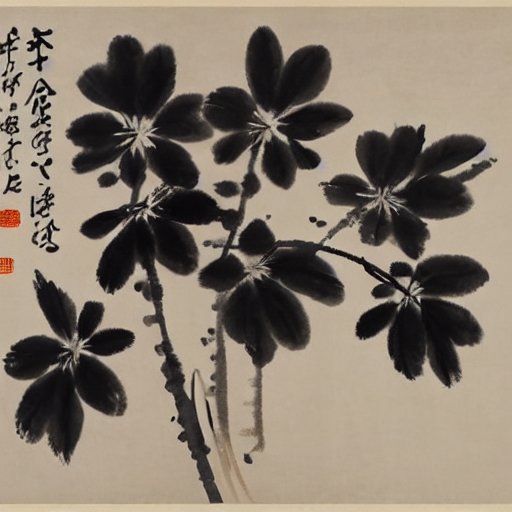

In [15]:
pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16
).to("cuda:0")

load_lora(
    pipeline = pipeline
    , lora_path = lora_path
    , lora_weight = 0.5
    , device = "cuda"
)

prompt = """
shukezouma, shuimobysim ,a branch of flower, traditional chinese ink painting
"""
image = pipeline(
    prompt = prompt
    , generator = torch.Generator("cuda").manual_seed(1)
).images[0]
display(image)